# Import libraries

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#1. Read data
data = pd.read_csv('train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
df1 = data.copy()

# Xử lý dữ liệu không nhất quán

# Age

In [6]:
df1["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [7]:
# xoá các ký tự không hợp lệ:
df1['Age'] = df1['Age'].str.replace(' ', '').str.replace('-', '').str.replace('_', '')

# đổi về kiểu int:
df1["Age"] = pd.to_numeric(df1["Age"], downcast="integer")

# Check kiểu dữ liệu:
df1["Age"].dtype

dtype('int16')

In [8]:
# df1["Age"].unique()

In [9]:
# df1['Age'].hist(bins=10)

# SSN

In [10]:
df1["SSN"].unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [11]:
df1.SSN.value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [12]:
# Thay đổi giá trị không hợp lệ bằng NaN
df1['SSN'] = df1['SSN'].replace('#F%$D@*&8', np.nan)


In [13]:
df1['SSN'].isna().sum()

5572

# Occupation

In [14]:
df1.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [15]:
# Thay đổi giá trị không hợp lệ bằng NaN
df1['Occupation'] = df1['Occupation'].replace('_______', np.nan)


In [16]:
df1['Occupation'].isna().sum()

7062

# Annual_Income

In [17]:
df1["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [18]:
df1.Annual_Income.value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [19]:
# xoá ký tự "_" không hợp lệ:
df1["Annual_Income"] = df1["Annual_Income"].str.strip("_")

# chuyển str về int:
df1["Annual_Income"] = pd.to_numeric(df1["Annual_Income"], downcast="integer")
df1["Annual_Income"].dtype

dtype('float64')

# Payment_Behaviour

In [20]:
df1.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [21]:
# điền giá trị ko hợp lệ bằng nan
df1.loc[(df1["Payment_Behaviour"] == "!@9#%8"), "Payment_Behaviour"] = np.nan

# Monthly_Balance

In [22]:
df1["Monthly_Balance"].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [23]:
# đếm số lần xuất hiện của các giá trị duy nhất của cột Monthly_Balance:
df1.Monthly_Balance.value_counts(dropna=False)

NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.6736955618808                      1
Name: Monthly_Balance, Length: 98793, dtype: int64

In [24]:
# đếm giá trị ko hợp lệ:
df1[pd.to_numeric(
    df1["Monthly_Balance"],
    errors="coerce").isna()]["Monthly_Balance"].value_counts(dropna=False)

NaN                                 1200
__-333333333333333333333333333__       9
Name: Monthly_Balance, dtype: int64

In [25]:
# thay giá trị không hợp lệ bằng null:
df1["Monthly_Balance"] = df1["Monthly_Balance"].replace('__-333333333333333333333333333__', np.nan)

In [26]:
# # loại bỏ ký tự không hợp lệ:
# df1['Monthly_Balance'] = df1['Monthly_Balance'].apply(
#     lambda x: x.replace('_', '').replace('-', '') if isinstance(x, str) else x)

# chuyển về kiểu float:
df1["Monthly_Balance"] = df1["Monthly_Balance"].astype('float')

# Check kiểu dữ liệu:
df1["Monthly_Balance"].dtype

dtype('float64')

In [27]:
# df1["Monthly_Balance"].hist(bins=10)

In [28]:
# df1["Monthly_Balance"].isna().sum()

# Credit_Mix

In [29]:
df1["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [30]:
df1.Credit_Mix.value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [31]:
# chuyển "_" bằng null
df1.loc[df1["Credit_Mix"] == "_", "Credit_Mix"] = pd.NA

In [32]:
df1["Credit_Mix"].isna().sum()

20195

# Outstanding_Debt

In [33]:
df1.Outstanding_Debt.value_counts().sample(10)


3399.01    8
4440.34    8
4654.92    8
3.74       8
33.16      8
1571.52    8
1319.24    8
527.16     8
15.58      8
860.4      8
Name: Outstanding_Debt, dtype: int64

In [34]:
df1[pd.to_numeric(df1["Outstanding_Debt"], errors="coerce").isna()]["Outstanding_Debt"].head(20)

87      1328.93_
142     1283.37_
368     2797.17_
632     3818.57_
703      343.84_
731      363.51_
782      404.51_
819     1755.81_
835     2593.44_
992       89.62_
1147    1054.86_
1148    1054.86_
1162    1374.23_
1243    1166.47_
1339     457.81_
1369    1684.06_
1486    1126.35_
1542    2098.83_
1573     761.18_
1633    1343.01_
Name: Outstanding_Debt, dtype: object

In [35]:
df1["Outstanding_Debt"] = df1["Outstanding_Debt"].str.strip("_")

df1["Outstanding_Debt"] = pd.to_numeric(df1["Outstanding_Debt"], downcast="float")

df1["Outstanding_Debt"].dtype

dtype('float32')

# Num_of_Loan

In [36]:
df1["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [37]:
df1[pd.to_numeric(df1["Num_of_Loan"], errors="coerce").isna()]["Num_of_Loan"].head(20)


37     0_
80     3_
84     3_
94     2_
119    5_
125    2_
131    0_
144    0_
158    5_
256    2_
360    8_
366    8_
377    2_
382    2_
391    9_
410    5_
442    4_
481    7_
483    7_
486    7_
Name: Num_of_Loan, dtype: object

In [38]:
df1["Num_of_Loan"] = df1["Num_of_Loan"].str.strip("_")
df1["Num_of_Loan"] = pd.to_numeric(df1["Num_of_Loan"], downcast="integer")

df1["Num_of_Loan"].dtype

dtype('int16')

# Num_of_Delayed_Payment

In [39]:
df1["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [40]:
df1["Num_of_Delayed_Payment"] = df1["Num_of_Delayed_Payment"].str.strip("_")

df1["Num_of_Delayed_Payment"] = pd.to_numeric(df1["Num_of_Delayed_Payment"],
                                              downcast="integer")

df1["Num_of_Delayed_Payment"].dtype

dtype('float64')

# Amount_invested_monthly

In [41]:
df1.Amount_invested_monthly.value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [42]:
df1[pd.to_numeric(df1["Amount_invested_monthly"], errors="coerce").isna()]["Amount_invested_monthly"].value_counts(dropna=False)


NaN          4479
__10000__    4305
Name: Amount_invested_monthly, dtype: int64

In [43]:
df1["Amount_invested_monthly"] = df1["Amount_invested_monthly"].str.strip("_")

df1["Amount_invested_monthly"] = pd.to_numeric(df1["Amount_invested_monthly"],
                                               downcast="float")

df1["Amount_invested_monthly"].dtype

dtype('float32')

# Credit_History_Age

In [44]:
# Tách số năm và số tháng
years = df1['Credit_History_Age'].str.extract(r'(\d+)\s+Years')[0]
months = df1['Credit_History_Age'].str.extract(r'(\d+)\s+Months')[0]

# Chuyển sang float, xử lý NaN
years = pd.to_numeric(years, errors='coerce')
months = pd.to_numeric(months, errors='coerce')

# Tính tổng số tháng và giữ nguyên giá trị NaN
df1['Credit_History_Age_Months'] = (years * 12 + months).round()

# Không ép kiểu sang Int64 để tránh lỗi với NaN
df1['Credit_History_Age_Months'] = df1['Credit_History_Age_Months'].astype('Int64')

# Xem kết quả
df1[['Credit_History_Age', 'Credit_History_Age_Months']].head()


,Credit_History_Age,Credit_History_Age_Months
0,22 Years and 1 Months,265
1,NaN,<NA>
2,22 Years and 3 Months,267
3,22 Years and 4 Months,268
4,22 Years and 5 Months,269


In [45]:
df1['Credit_History_Age_Months']

0         265
1        <NA>
2         267
3         268
4         269
         ... 
99995     378
99996     379
99997     380
99998     381
99999     382
Name: Credit_History_Age_Months, Length: 100000, dtype: Int64

In [46]:
# df1.head()

# Kiểm tra dữ liệu thiếu

In [47]:
df2 = df1

In [48]:
# in ra các cột có số lượng null >0
df2.isnull().sum()[df2.isnull().sum() > 0]

Name                          9985
SSN                           5572
Occupation                    7062
Monthly_Inhand_Salary        15002
Type_of_Loan                 11408
Num_of_Delayed_Payment        7002
Num_Credit_Inquiries          1965
Credit_Mix                   20195
Credit_History_Age            9030
Amount_invested_monthly       4479
Payment_Behaviour             7600
Monthly_Balance               1209
Credit_History_Age_Months     9030
dtype: int64

In [49]:
# df2.info()

In [50]:
def show_missing_data(df):
  missing_data = data.isnull().sum()
  missing_data = missing_data[missing_data > 0]
  missing_percentage = (missing_data / len(data)) * 100
  missing_table = pd.DataFrame({'Missing Values': missing_data,
                                 'Percentage (%)': missing_percentage})
  print("Cột có giá trị null và tỷ lệ phần trăm missing:")
  print(missing_table.sort_values(by='Percentage (%)', ascending=False))


show_missing_data(df2)

Cột có giá trị null và tỷ lệ phần trăm missing:
                         Missing Values  Percentage (%)
Monthly_Inhand_Salary             15002          15.002
Type_of_Loan                      11408          11.408
Name                               9985           9.985
Credit_History_Age                 9030           9.030
Num_of_Delayed_Payment             7002           7.002
Amount_invested_monthly            4479           4.479
Num_Credit_Inquiries               1965           1.965
Monthly_Balance                    1200           1.200


- Name: có những khách hàng chưa được thêm thông tin tuy nhiên tại cột Custormer_ID đủ thông tin nên ta điền thông tin Name dựa vào cột Custormer_ID tương ứng
- Monthly_Inhand_Salary: có thể thêm mức lương dựa vào cột lương trung bình hàng năm(Annual_Income)
- SSN(mã số an sinh xã hội): vì mỗi khách hàng có mỗi mã SSN khác nhau nên ta dựa vào cột Custormer_ID để điền thông tin
-


# Xử lý dữ liệu thiếu

1. Name

In [51]:
#2. Convert into lower and check shape
df2.columns = [x.lower() for x in df2.columns]
# print(df2.columns)
# print(f'Số hàng và số cột của data: {data.shape}')

In [52]:
# Is the number of occurrences for each customer_id the same?
(df2["customer_id"].value_counts() == 8).all()

True

In [53]:
# Fill missing values in the "name" column with the mode of each customer group.
df2["name"] = df2.groupby("customer_id")["name"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check if each customer group in "name" has exactly 8 observations.
(df2.groupby("customer_id")["name"].count() == 8).all()

True

In [54]:
# df1.groupby("customer_id")["name"].count()

2. SSN


In [55]:
# Group by "customer_id" and fill missing SSNs with the most frequent value within each group
df2['ssn'] = df2.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [56]:
df2.ssn.value_counts()

821-00-0265    8
544-05-0223    8
381-36-5261    8
994-73-1178    8
647-44-9598    8
              ..
936-12-2774    8
091-61-1869    8
576-38-5212    8
281-30-1712    8
078-73-5990    8
Name: ssn, Length: 12500, dtype: int64

3. Occupation

In [57]:
df2["occupation"] = df2.groupby("customer_id")["occupation"].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [58]:
# Count the number of customers with only one unique occupation
(df2.groupby("customer_id")["occupation"].nunique() == 1).sum()  # 12500X8 = 100000

12500

4. Monthly_Inhand_Salary

In [59]:
# df2.month

lambda x: x.fillna(method="ffill").fillna(method="bfill"):

fillna(method="ffill"): Forward fill — điền giá trị thiếu bằng giá trị phía trước trong cùng nhóm customer_id.

Sau đó tiếp tục .fillna(method="bfill"): nếu vẫn còn NaN ở đầu chuỗi (không có giá trị phía trước), thì dùng backward fill — lấy giá trị phía sau để điền.

In [60]:
# Sắp xếp dữ liệu theo customer_id và month
# df2 = df2.sort_values(by=["customer_id", "month"])

# Điền giá trị thiếu trong cột monthly_inhand_salary theo nhóm customer_id
df2["monthly_inhand_salary"] = df2.groupby("customer_id")["monthly_inhand_salary"]\
    .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))



In [61]:
# Check the maximum difference between unique monthly_inhand_salary values for each customer
filtered_df = df2.groupby("customer_id")["monthly_inhand_salary"].unique()
filtered_df

customer_id
CUS_0x1000    [2706.1616666666664]
CUS_0x1009               [4250.39]
CUS_0x100b             [9549.7825]
CUS_0x1011             [5208.8725]
CUS_0x1013     [7962.415000000001]
                      ...         
CUS_0xff3             [1176.39875]
CUS_0xff4               [2415.855]
CUS_0xff6      [9727.326666666666]
CUS_0xffc              [5218.0975]
CUS_0xffd                [3749.87]
Name: monthly_inhand_salary, Length: 12500, dtype: object

In [62]:
# thêm một cột là số lượng số lương vào filtered_df
filtered_df = filtered_df.apply(lambda x: len(x))
filtered_df.unique()

array([1, 2])

5. Type_of_Loan

In [63]:
df2['customer_id'].value_counts()

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: customer_id, Length: 12500, dtype: int64

In [65]:
# Groups the data by 'customer_id', counts the occurrences of each 'type_of_loan' for each customer,
# and then randomly samples 20 rows from the result
df2.groupby("customer_id")["type_of_loan"].value_counts().sample(10)

customer_id  type_of_loan                                                                                                                                
CUS_0x95c9   Credit-Builder Loan, Auto Loan, Not Specified, Mortgage Loan, Credit-Builder Loan, Payday Loan, and Payday Loan                                 8
CUS_0x7fe3   Not Specified, Payday Loan, Auto Loan, and Payday Loan                                                                                          8
CUS_0x275c   Debt Consolidation Loan, Student Loan, Home Equity Loan, Student Loan, Payday Loan, Debt Consolidation Loan, Mortgage Loan, and Student Loan    8
CUS_0x3371   Auto Loan, Auto Loan, Student Loan, Debt Consolidation Loan, Home Equity Loan, Not Specified, and Mortgage Loan                                 8
CUS_0x2d37   Credit-Builder Loan, Personal Loan, Student Loan, Mortgage Loan, and Student Loan                                                               8
CUS_0x9730   Debt Consolidation Loan, and Debt Cons

In [66]:
# Groups the data by 'customer_id' and 'type_of_loan', counts the occurrences of each loan type per customer,
# then counts how many times each unique count of loan types appears across customers.
df2.groupby("customer_id")["type_of_loan"].value_counts().value_counts()

8    11074
Name: type_of_loan, dtype: int64

In [67]:
# Counts the number of customers where the 'type_of_loan' is missing (NaN).
df2[df2["type_of_loan"].isna()]["customer_id"].count()

11408

In [68]:
# Updates the 'type_of_loan' column to "No Loan" for customers who have 0 loans.
df2.loc[df2["num_of_loan"] == 0, "type_of_loan"] = "No Loan"

In [69]:
df2['type_of_loan'].isna().sum()

478

In [72]:
missing_loan_rows = df2[df2['type_of_loan'].isna()]
missing_loan_rows.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_months
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.710,2853.309167,7,...,943.859985,23.462303,30 Years and 10 Months,Yes,0.0,173.138657,Low_spent_Medium_value_payments,392.192266,Standard,370
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547.710,2853.309167,7,...,943.859985,25.862922,31 Years and 3 Months,Yes,0.0,181.330902,High_spent_Small_value_payments,364.000016,Standard,375
180,0x170e,CUS_0xac86,May,Nickb,20,028-16-4402,Entrepreneur,106733.130,8873.427500,4,...,76.230003,28.820554,33 Years and 1 Months,No,0.0,345.609131,High_spent_Medium_value_payments,791.733615,Good,397
327,0x17e9,CUS_0xb5ff,August,Nateg,33,060-81-1328,Media_Manager,12909.895,853.824583,5,...,602.500000,23.579851,17 Years and 8 Months,No,0.0,60.052635,Low_spent_Medium_value_payments,305.329824,Standard,212
355,0x1815,CUS_0xaedb,April,Olivia Oranr,19,272-47-1135,Musician,85554.030,7185.502500,4,...,1095.729980,31.360245,19 Years and 10 Months,No,0.0,303.664673,Low_spent_Large_value_payments,684.885563,Good,238


In [79]:
# mỗi customer_id có thể xuất hiện nhiều lần trong dữ liệu (tức là không unique).
# một khách hàng thường vay cùng một loại loan hoặc cùng nhóm loans → mode
# tách ra từng loại
df_exploded = df2.explode("type_of_loan")

In [81]:
# Đếm số loại loan khác nhau của mỗi khách hàng
loan_diversity = df_exploded.groupby("customer_id")["type_of_loan"].nunique()
print(loan_diversity)

customer_id
CUS_0x1000    1
CUS_0x1009    1
CUS_0x100b    1
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: type_of_loan, Length: 12500, dtype: int64


In [82]:
# Thống kê mức độ đa dạng
loan_diversity.value_counts().sort_index()

1    12500
Name: type_of_loan, dtype: int64

==> mỗi khách hàng (dù xuất hiện 8 lần) luôn có cùng một loại type_of_loan được lặp lại trong các lần xuất hiện đó.

In [83]:
# Tính mode theo customer_id
loan_mode = df2.groupby("customer_id")["type_of_loan"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
# Điền giá trị thiếu dựa trên mode của cùng customer_id
df2["type_of_loan"] = df2.apply(lambda row: loan_mode[row["customer_id"]] if pd.isna(row["type_of_loan"]) else row["type_of_loan"],axis=1)

In [84]:
df2.groupby("customer_id")["type_of_loan"].value_counts().value_counts()

8    12500
Name: type_of_loan, dtype: int64

In [85]:
df2[df2["type_of_loan"].isna()]["customer_id"].count()

0

In [86]:
# # Removes the string " and" from the 'type_of_loan' column without using regular expressions.
df2["type_of_loan"] = df2["type_of_loan"].str.replace(" and", "", regex=False)
# # Splits the 'type_of_loan' column by ", " to create a list of loan types for each row.
df2["type_of_loan"] = df2["type_of_loan"].str.split(", ")

In [87]:
df2["type_of_loan"].value_counts().sample(10)

[Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified]                                                                                8
[Payday Loan, Home Equity Loan, Debt Consolidation Loan, Personal Loan]                                                                     8
[Mortgage Loan, Student Loan, Mortgage Loan, Payday Loan, Student Loan]                                                                     8
[Student Loan, Credit-Builder Loan, Mortgage Loan, Student Loan, Auto Loan, Mortgage Loan]                                                  8
[Auto Loan, Debt Consolidation Loan, Auto Loan, Personal Loan, Credit-Builder Loan, Home Equity Loan]                                       8
[Home Equity Loan, Personal Loan, Student Loan, Payday Loan]                                                                                8
[Mortgage Loan, Personal Loan, Student Loan, Student Loan, Not Specified, Home Equity Loan, Payday Loan, Credit-Builder Loan, Auto Loan]    8
[Debt 

In [88]:
unique_loans = set()
for loans in df2["type_of_loan"]:
    if isinstance(loans, list):
        for loan in loans:
            unique_loans.add(loan.strip())
unique_loans = sorted(unique_loans)
unique_loans

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

6. Num_of_Delayed_Payment

In [89]:
# Counting the number of missing ('NaN') values in 'num_of_delayed_payment' for each 'customer_id'
df2[df2["num_of_delayed_payment"].isna()].groupby("customer_id").size()

customer_id
CUS_0x1011    2
CUS_0x1013    1
CUS_0x1018    1
CUS_0x102d    1
CUS_0x102e    1
             ..
CUS_0xfdd     1
CUS_0xfe3     3
CUS_0xfe4     2
CUS_0xff6     1
CUS_0xffd     1
Length: 5465, dtype: int64

In [90]:
# Counting the frequency of each unique value in 'num_of_delayed_payment' and sorting by index
df2["num_of_delayed_payment"].value_counts().sort_index().head(50)

-3.0        94
-2.0       234
-1.0       316
 0.0      1609
 1.0      1636
 2.0      1810
 3.0      1931
 4.0      1838
 5.0      2091
 6.0      2321
 7.0      2385
 8.0      4873
 9.0      4981
 10.0     5309
 11.0     4810
 12.0     5059
 13.0     4036
 14.0     4193
 15.0     5237
 16.0     5312
 17.0     5412
 18.0     5216
 19.0     5481
 20.0     5089
 21.0     2553
 22.0     2339
 23.0     2028
 24.0     1701
 25.0     1665
 26.0      322
 27.0      250
 28.0      131
 46.0        1
 47.0        1
 49.0        1
 52.0        1
 72.0        1
 80.0        1
 84.0        1
 85.0        1
 86.0        1
 88.0        1
 94.0        1
 98.0        1
 102.0       1
 106.0       1
 107.0       1
 121.0       1
 130.0       1
 132.0       1
Name: num_of_delayed_payment, dtype: int64

In [91]:
# Handling out-of-range values for 'num_of_delayed_payment'
df2.loc[(df2["num_of_delayed_payment"] < 0) | (df2["num_of_delayed_payment"] > 28), "num_of_delayed_payment"] = np.nan

# Filling missing values (NaN) within each 'customer_id' group using forward and backward fill
df2["num_of_delayed_payment"] = df2.groupby("customer_id")["num_of_delayed_payment"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Checking the total number of missing values after filling
df2["num_of_delayed_payment"].isna().sum()

0

7. Num_Credit_Inquiries

In [92]:
# Group by 'customer_id' and get unique values in the 'num_credit_inquiries' column for each customer
df2.groupby("customer_id")["num_credit_inquiries"].unique()

customer_id
CUS_0x1000          [10.0, 11.0]
CUS_0x1009            [2.0, 4.0]
CUS_0x100b    [1.0, 2271.0, 4.0]
CUS_0x1011         [7.0, 1965.0]
CUS_0x1013                 [3.0]
                     ...        
CUS_0xff3             [3.0, 5.0]
CUS_0xff4             [5.0, nan]
CUS_0xff6             [nan, 2.0]
CUS_0xffc            [8.0, 13.0]
CUS_0xffd     [1801.0, nan, 7.0]
Name: num_credit_inquiries, Length: 12500, dtype: object

In [93]:
# Get the value counts of 'num_credit_inquiries', including NaN values, and display the top 30
df2["num_credit_inquiries"].value_counts(dropna=False).head(30)

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
8.0        7866
1.0        7588
0.0        6972
5.0        5693
9.0        5283
11.0       5051
10.0       4936
12.0       4571
NaN        1965
13.0       1480
14.0       1039
15.0        808
16.0        456
17.0        284
1786.0        4
318.0         4
1622.0        4
1114.0        4
1230.0        4
31.0          4
53.0          4
1768.0        4
1460.0        4
2297.0        4
285.0         4
Name: num_credit_inquiries, dtype: int64

In [94]:
# The data is inconsistent;
#But while the 'Num of Loans' value is recorded over a 6-year period,
#the 'num_credit_inquiries' value is only recorded for 2 years
df2[df2["num_credit_inquiries"] == 0][["num_credit_inquiries", "num_of_loan"]]

,num_credit_inquiries,num_of_loan
120,0.0,2
121,0.0,2
128,0.0,0
176,0.0,0
177,0.0,0
...,...,...
99795,0.0,1
99796,0.0,1
99797,0.0,1
99798,0.0,1


In [95]:
# Fill NaN values using forward fill and backward fill within each customer_id group
df2["num_credit_inquiries"] = df2.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many NaN values are left in 'num_credit_inquiries'
df2["num_credit_inquiries"].isna().sum()

0

8. Credit_Mix

In [96]:
df2.credit_mix.value_counts()

Standard    36479
Good        24337
Bad         18989
Name: credit_mix, dtype: int64

In [97]:
# Group by customer_id and count unique values in credit_mix, then display the first 20
df2.groupby("customer_id")["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
CUS_0x100b   Good          7
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
CUS_0x1015   Standard      8
CUS_0x1018   Bad           6
CUS_0x1026   Good          6
CUS_0x102d   Good          7
CUS_0x102e   Standard      6
CUS_0x1032   Standard      8
CUS_0x1037   Good          7
CUS_0x1038   Standard      5
CUS_0x103e   Good          8
CUS_0x1041   Bad           6
CUS_0x1044   Good          7
CUS_0x1048   Standard      7
CUS_0x104a   Good          6
CUS_0x104e   Standard      5
CUS_0x104f   Standard      7
Name: credit_mix, dtype: int64

In [98]:
# Count how many customer_ids have exactly 3 unique credit_mix values
(df2.groupby(["customer_id"])["credit_mix"].nunique() == 3).sum()

0

In [99]:
# Fill NaN values in 'credit_mix' for each customer with the most frequent value (mode)
df2["credit_mix"] = df2.groupby("customer_id")["credit_mix"].transform(
    lambda x: x.fillna(x.mode()[0]))

# Check the number of remaining NaN values in 'credit_mix'
df2["credit_mix"].isna().sum()

0

9. Credit_History_Age

10. Amount_invested_monthly

In [100]:
# Count occurrences of each unique value in the amount_invested_monthly' column, including NaN value
df2.amount_invested_monthly.value_counts(dropna=False).head(20)

NaN             4479
10000.000000    4305
0.000000         169
133.477356         2
258.579742         2
289.631561         2
56.584618          2
105.325279         2
174.601471         2
257.395691         2
278.636566         2
118.342598         2
154.766571         2
163.614243         2
536.648132         2
314.737213         2
146.224899         2
576.811584         2
25.415653          2
149.759796         2
Name: amount_invested_monthly, dtype: int64

In [101]:
# Check if all values in 'amount_invested_monthly' are NaN for each 'customer_id'
df2.groupby("customer_id")["amount_invested_monthly"].apply(
    lambda x: x.isna().all()).sum()

0

In [102]:
# Fill missing values in 'amount_invested_monthly' using forward fill and backward fill
df2["amount_invested_monthly"] = df2.groupby("customer_id")["amount_invested_monthly"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many missing values are left in 'amount_invested_monthly'
df2["amount_invested_monthly"].isna().sum()

0

11. Payment_Behaviour

In [103]:
# Count the occurrences of each unique value in the 'payment_behaviour' column, including NaN values
df2.payment_behaviour.value_counts(dropna=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: payment_behaviour, dtype: int64

In [104]:
# Group the DataFrame by 'customer_id', then calculate the number of unique values in the 'payment_behaviour' column for each customer
df2.groupby(["customer_id"])["payment_behaviour"].nunique().head(10)

customer_id
CUS_0x1000    4
CUS_0x1009    3
CUS_0x100b    5
CUS_0x1011    4
CUS_0x1013    3
CUS_0x1015    4
CUS_0x1018    3
CUS_0x1026    4
CUS_0x102d    4
CUS_0x102e    5
Name: payment_behaviour, dtype: int64

In [105]:
# Fill the missing 'payment_behaviour' values within each 'customer_id' group using forward-fill (ffill) and backward-fill (bfill)
df2["payment_behaviour"] = df2.groupby("customer_id")["payment_behaviour"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Check how many missing values are left in the 'payment_behaviour' column
df2["payment_behaviour"].isna().sum()

0

12. Monthly_Balance

In [106]:
# Fill missing 'monthly_balance' values with the mean of each 'customer_id' group
df2["monthly_balance"] = df2.groupby("customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

In [107]:
# Count the number of customer_id groups where all monthly_balance values are NaN
df2.groupby("customer_id")["monthly_balance"].apply(
    lambda x: x.isna().all()).sum()

0

13. Credit_History_Age_Months

In [108]:
def fill_nan(group):
    # First loop: Fill NaN values with the previous value + 1
    for i in range(len(group)):
        if pd.isna(group.loc[group.index[i], "credit_history_age_months"]):
            # Get the previous value
            if i > 0:
                group.loc[group.index[i], "credit_history_age_months"] = (
                    group.loc[group.index[i - 1], "credit_history_age_months"] + 1
                )
            else:
                group.loc[group.index[i], "credit_history_age_months"] = np.nan

    # Second loop: Fill NaN values by looking forward (backward fill)
    for i in range(len(group) - 1, -1, -1):
        if pd.isna(group.loc[group.index[i], "credit_history_age_months"]):
            if i < len(group) - 1:
                group.loc[group.index[i], "credit_history_age_months"] = (
                    group.loc[group.index[i + 1], "credit_history_age_months"] - 1
                )

    return group

In [109]:
# Grouping the DataFrame by 'customer_id' and applying the 'fill_nan' function to each group
# The 'group_keys=False' ensures that the group labels are not included in the result.
df2 = df2.groupby("customer_id", group_keys=False).apply(fill_nan)

In [110]:
df2.credit_history_age_months.isna().sum()

0

In [111]:
df2.groupby("customer_id")["credit_history_age_months"].value_counts().head(20)
#

customer_id  credit_history_age_months
CUS_0x1000   122                          1
             123                          1
             124                          1
             125                          1
             126                          1
             127                          1
             128                          1
             129                          1
CUS_0x1009   365                          1
             366                          1
             367                          1
             368                          1
             369                          1
             370                          1
             371                          1
             372                          1
CUS_0x100b   183                          1
             184                          1
             185                          1
             186                          1
Name: credit_history_age_months, dtype: int64

In [112]:
df2.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.97998,26.822620,22 Years and 1 Months,No,49.574949,80.415298,High_spent_Small_value_payments,312.494089,Good,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.97998,31.944960,NaN,No,49.574949,118.280220,Low_spent_Large_value_payments,284.629162,Good,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.97998,28.609352,22 Years and 3 Months,No,49.574949,81.699524,Low_spent_Medium_value_payments,331.209863,Good,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.97998,31.377862,22 Years and 4 Months,No,49.574949,199.458069,Low_spent_Small_value_payments,223.451310,Good,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.97998,24.797347,22 Years and 5 Months,No,49.574949,41.420155,High_spent_Medium_value_payments,341.489231,Good,269


# Ngoại lai

In [113]:
df3 = df2.copy()

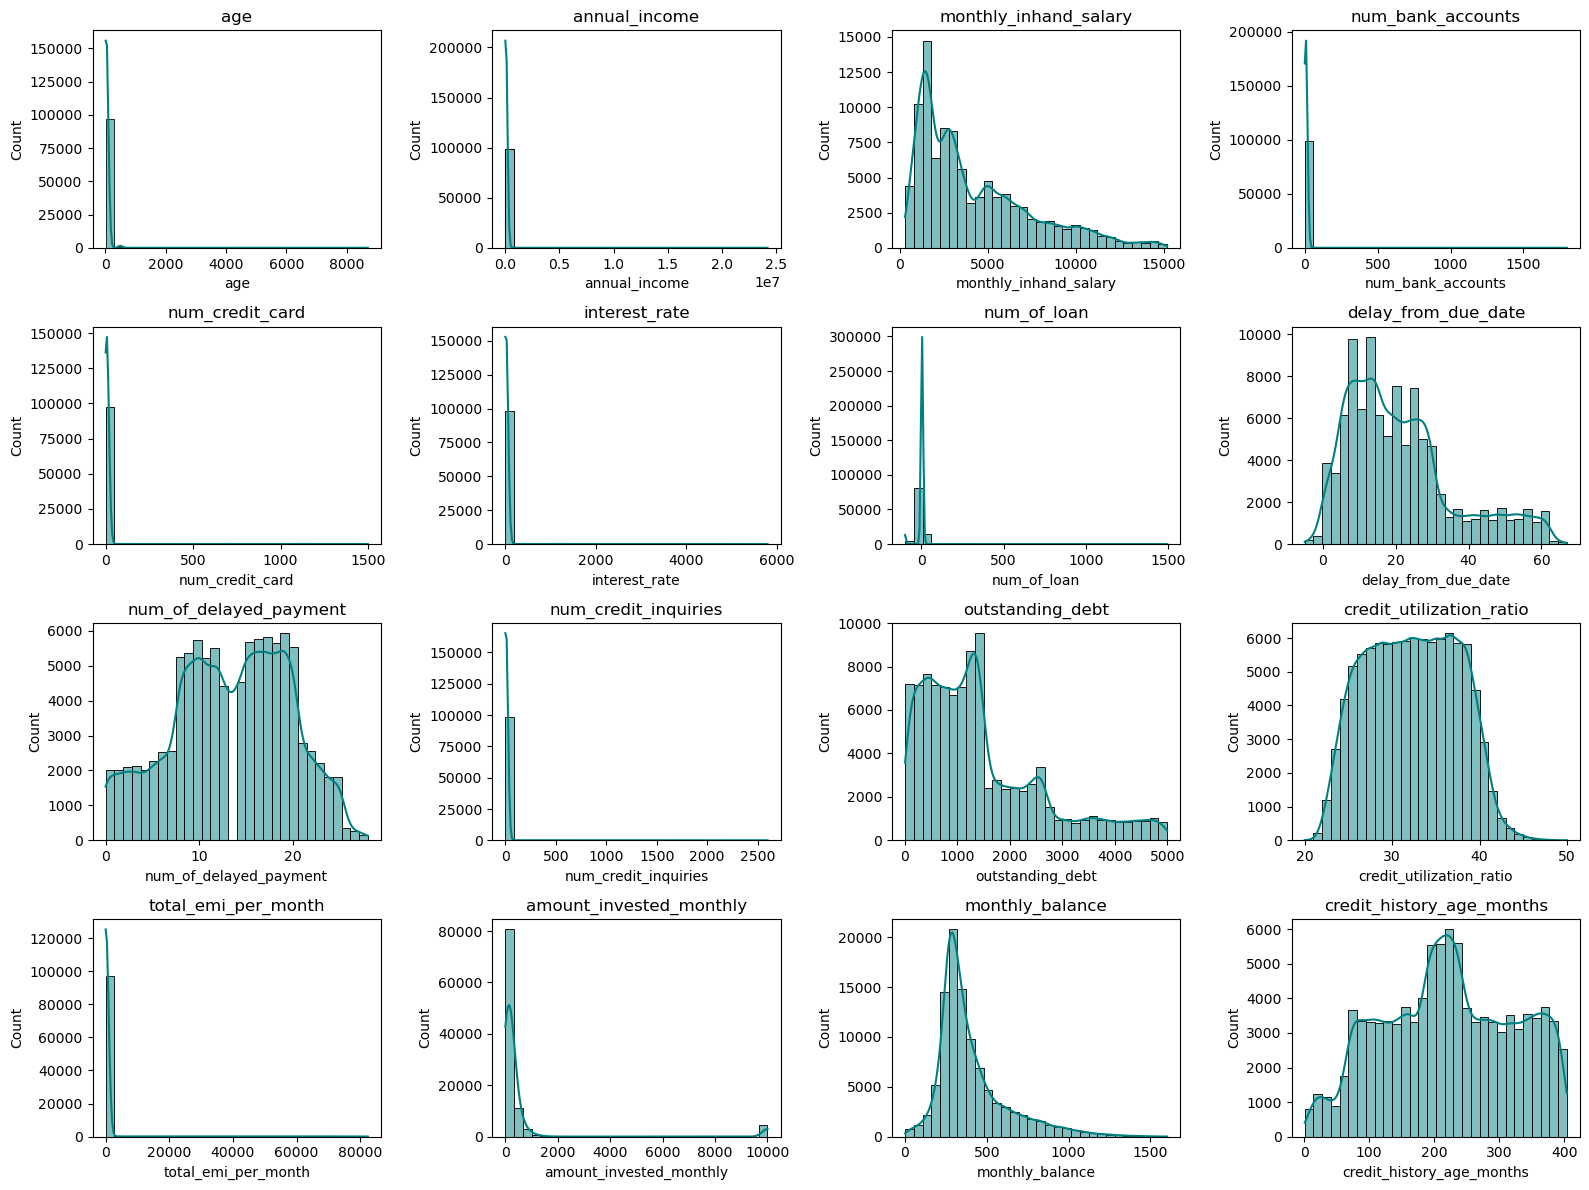

In [114]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns, 1):
    plt.subplot(4, 4, i)  # 4 hàng, 5 cột (tuỳ chỉnh theo số biến)
    sns.histplot(df3[col], bins=30, kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()

plt.show()

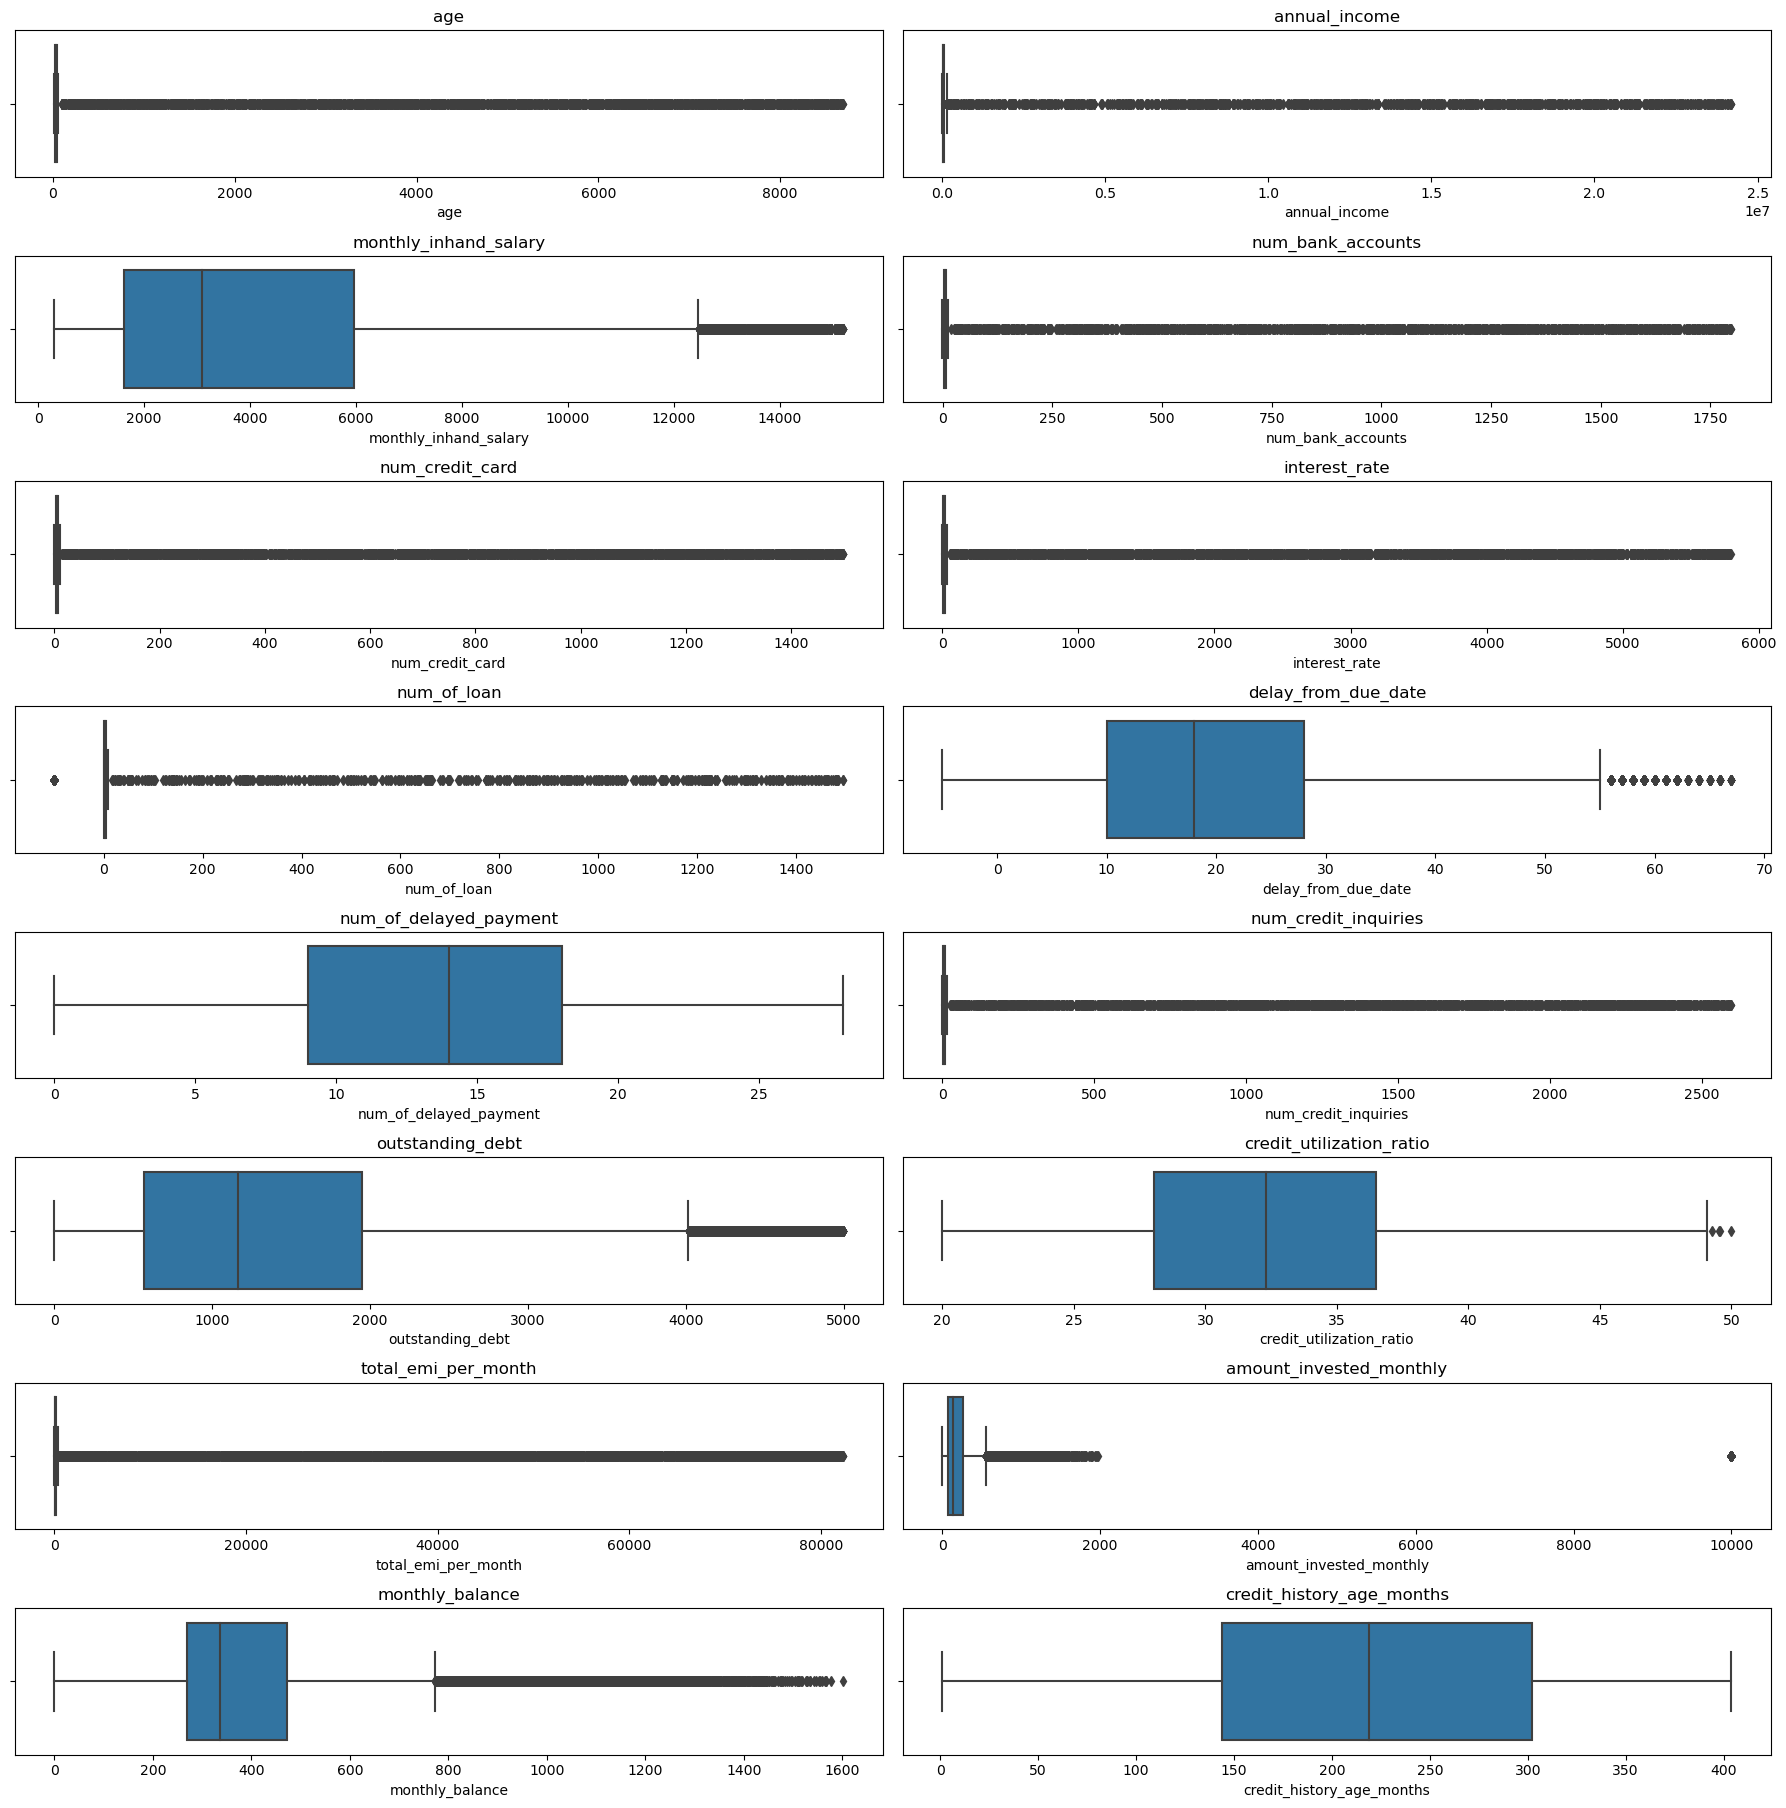

In [115]:
numeric_cols = df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns

plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols)+2)//2, 2, i+1)
    sns.boxplot(x=df3[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Xử lý ngoại lai

# 1. Age

In [116]:
df3[df3['age'] <= 100]['age'].value_counts().sort_index()


14     1175
15     1574
16     1455
17     1502
18     2385
19     2793
20     2744
21     2716
22     2785
23     2654
24     2714
25     2861
26     2945
27     2859
28     2968
29     2735
30     2727
31     2955
32     2884
33     2543
34     2837
35     2866
36     2868
37     2742
38     2994
39     2846
40     2609
41     2785
42     2577
43     2734
44     2824
45     2642
46     1621
47     1227
48     1385
49     1375
50     1273
51     1291
52     1356
53     1354
54     1311
55     1366
56      362
95        3
99        1
100       1
Name: age, dtype: int64

- Từ 14 là độ tuổi vị thành niên có thể sẽ chưa đủ tuổi để được cấp vào sử dụng thẻ tín dụng
- Trong trường hợp bình thường, tuổi của con người giới hạn dưới 100 tuổi, nên những độ tuổi vượt mức có thể dữ liệu bị điền nhầm

In [117]:
# hiển thị các tuổi trên 100
df3[df3['age'] >= 100]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_months
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.979980,28.609352,22 Years and 3 Months,No,49.574949,81.699524,Low_spent_Medium_value_payments,331.209863,Good,267
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,1704.180054,24.448063,NaN,NM,70.478333,162.441010,Low_spent_Large_value_payments,298.192158,Poor,175
113,0x16ab,CUS_0xff4,February,Poornimaf,500,655-05-7666,Entrepreneur,25546.26,2415.855000,8,...,758.440002,29.711376,18 Years and 3 Months,Yes,101.328637,300.323242,Low_spent_Small_value_payments,129.933631,Standard,219
122,0x16b8,CUS_0x33d2,March,Chalmersa,181,965-46-2491,Scientist,31993.78,2942.148333,6,...,818.219971,27.380109,17 Years and 0 Months,Yes,45.141298,264.257080,Low_spent_Small_value_payments,274.816447,Standard,204
219,0x1749,CUS_0x3edc,April,Williamso,995,663-16-3845,Accountant,43070.24,3622.186667,3,...,1233.099976,24.331772,19 Years and 5 Months,Yes,30.576085,74.920372,High_spent_Medium_value_payments,506.722207,Standard,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,909.010010,25.982154,16 Years and 4 Months,No,45.076827,74.713577,High_spent_Small_value_payments,292.576093,Poor,196
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,Developer,22620.79,1722.065833,7,...,642.460022,31.841872,NaN,No,0.000000,105.076294,Low_spent_Large_value_payments,337.130290,Standard,352
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,418.029999,38.199635,20 Years and 7 Months,No,26.778419,502.376312,Low_spent_Small_value_payments,251.731594,Standard,247
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,3468.315833,0,...,1079.479980,30.625298,NaN,No,34.975457,31.193920,High_spent_Large_value_payments,520.662207,Standard,340


có một số khách hàng bị điền sai số tuổi nên ta sẽ chuyển các tuổi ko hợp lệ đó về null và điền lại dựa vào cột customer_id

In [118]:
# xử lý các tuổi ko hợp lệ:
df3.loc[df3["age"] > 56, "age"] = pd.NA

df3["age"] = df3.groupby("customer_id")["age"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


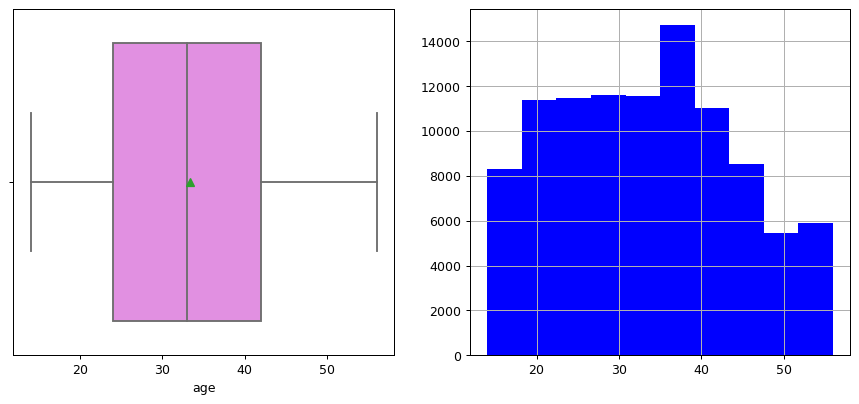

In [119]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.age, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['age'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 2. Monthly_Inhand_Salary


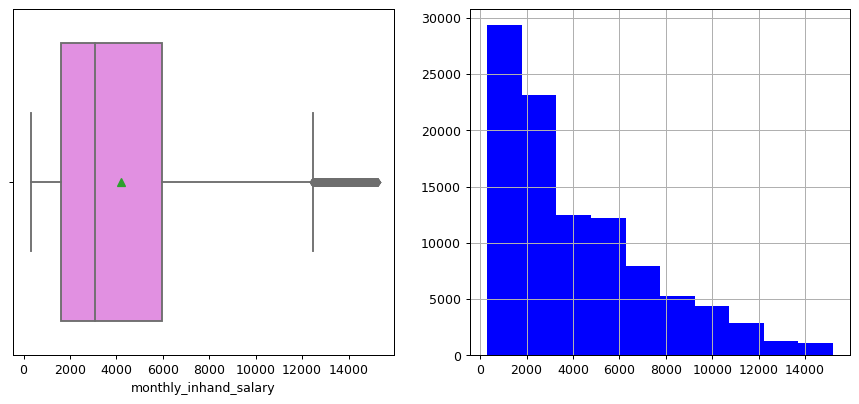

In [120]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.monthly_inhand_salary, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['monthly_inhand_salary'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

In [121]:
df3["monthly_inhand_salary"].value_counts().sample(20)


4733.642500     8
2457.925000     8
5069.090000     8
2537.645000     8
15115.190000    8
8805.730000     8
1608.262500     8
2193.846667     8
3276.820000     8
3282.870000     8
631.702083      8
2688.613333     8
6091.475000     8
1631.385833     8
1015.987917     8
4126.538333     8
2326.177500     8
1117.398333     8
3375.828333     8
1721.235833     8
Name: monthly_inhand_salary, dtype: int64

- Mặc dù các nghề nghiệp giống nhau, nhưng mức lương có thể khác nhau và có thể rất thấp hoặc rất cao. Do đó, chúng ta coi những giá trị ngoại lệ này là hợp lệ trong bối cảnh này và chấp nhận chúng là chính xác.

# 3. Annual_Income


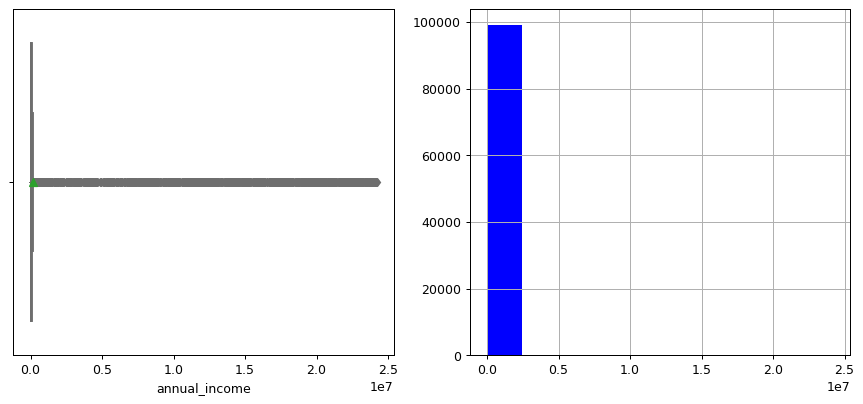

In [122]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.annual_income, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['annual_income'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 4. Num_Bank_Accounts(số tài khoản ngân hàng)


In [123]:
df3["num_bank_accounts"].value_counts().sort_index().head(40)

-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
 32        1
 33        2
 34        4
 35        1
 37        3
 38        1
 39        3
 40        1
 41        1
 42        2
 43        4
 45        1
 49        1
 50        1
 53        1
 55        1
 57        2
 59        1
 60        1
 61        1
Name: num_bank_accounts, dtype: int64

- Theo thống kê ta thấy có giá trị -1 và 11 là không hợp lệ đối với số lượng tài khoản ngân hàng


In [124]:
df3.loc[(df3["num_bank_accounts"] < 0) | (df3["num_bank_accounts"] > 11),
        "num_bank_accounts"] = pd.NA
# điền các giá trị thiếu bằng customer_id
df3["num_bank_accounts"] = df3.groupby(
    "customer_id")["num_bank_accounts"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))


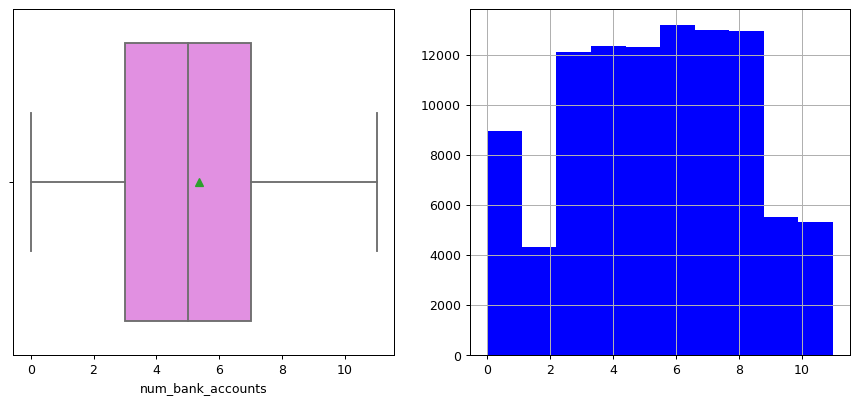

In [125]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_bank_accounts, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_bank_accounts'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 5. Num_Credit_Card


In [126]:
df3["num_credit_card"].value_counts().sort_index().head(20)

0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: num_credit_card, dtype: int64

In [127]:
# chuyển các giá trị ko hợp lệ
df3.loc[df3["num_credit_card"] > 11, "num_credit_card"] = pd.NA
df3["num_credit_card"] = df3.groupby(
    "customer_id")["num_credit_card"].transform(
        lambda x: x.fillna(method="ffill").fillna(method="bfill"))


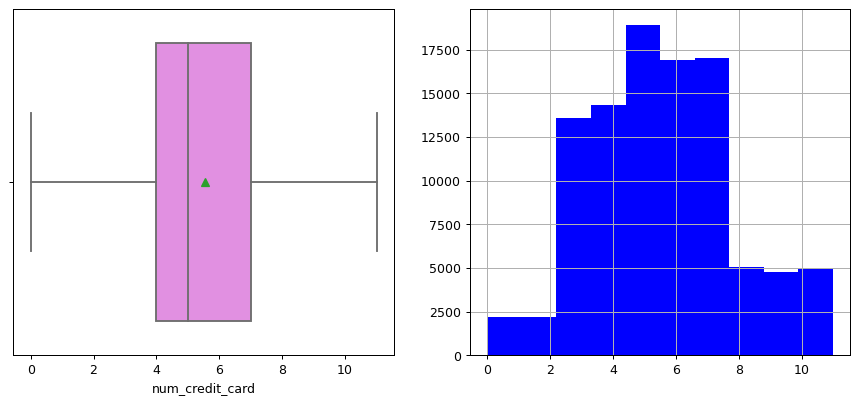

In [128]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_credit_card, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_credit_card'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 6. Interest_Rate(lãi suất)


In [129]:
df3.interest_rate.value_counts().sort_index().head(50)

1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
21    1560
22    1720
23    1683
24    1685
25    1566
26    1489
27    1608
28    1616
29    1662
30    1690
31    1457
32    1742
33    1467
34    1502
59       1
60       1
64       1
67       1
73       1
74       1
75       2
76       2
77       1
81       1
87       1
89       1
91       1
92       1
94       1
95       2
Name: interest_rate, dtype: int64

vì lãi suất có thể mỗi tháng sẽ khác nhau nên để dữ liệu vẫn giữ nguyên được ý nghĩa ban đầu thì ta sẽ điền bằng mode

In [130]:
df3.loc[df3["interest_rate"] > 34, "interest_rate"] = pd.NA
df3["interest_rate"] = df3.groupby("customer_id")["interest_rate"].transform(
    lambda x: x.fillna(x.mode()[0]))

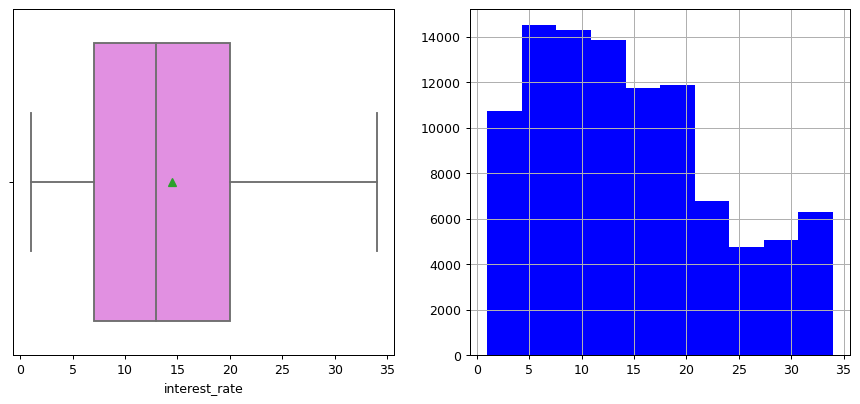

In [131]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.interest_rate, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['interest_rate'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 7. Num_Of_Loan(số khoản vay)


In [132]:
df3["num_of_loan"].value_counts().sort_index().head(20)

-100     3876
 0      10930
 1      10606
 2      15032
 3      15104
 4      14743
 5       7197
 6       7803
 7       7344
 8       3191
 9       3702
 17         1
 18         1
 19         1
 23         2
 27         1
 29         1
 31         2
 32         1
 33         2
Name: num_of_loan, dtype: int64

In [133]:
# chuyển các giá trị ko hợp lệ bằng null
df3.loc[(df3["num_of_loan"] < 0) | (df3["num_of_loan"] > 9), "num_of_loan"] = pd.NA

df3["num_of_loan"] = df3.groupby("customer_id")["num_of_loan"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


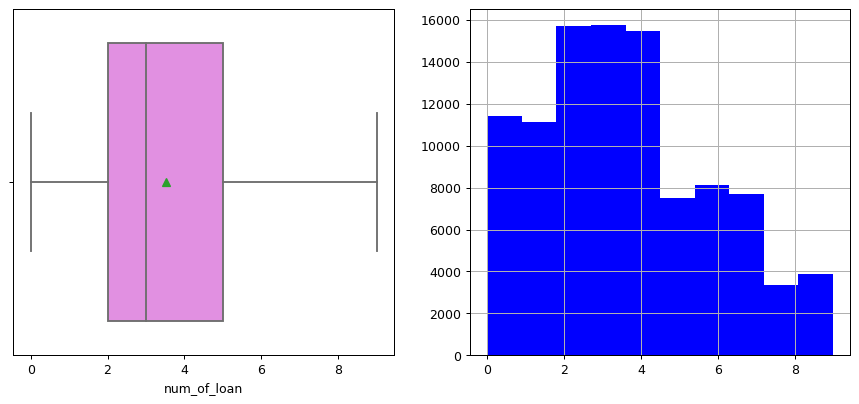

In [134]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_of_loan, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_of_loan'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 8. Delay_From_Due_Date


In [135]:
df3["delay_from_due_date"].value_counts().sort_index().head(30)

-5       33
-4       62
-3      118
-2      168
-1      210
 0     1195
 1     1326
 2     1342
 3     1686
 4     1722
 5     3042
 6     3137
 7     3234
 8     3324
 9     3233
 10    3281
 11    3182
 12    3141
 13    3424
 14    3313
 15    3596
 16    2566
 17    2524
 18    2637
 19    2638
 20    2489
 21    2411
 22    2334
 23    2387
 24    2533
Name: delay_from_due_date, dtype: int64

In [136]:
# chuyển đổi các giá trị âm thành giá trị dương:
df3["delay_from_due_date"] = df3["delay_from_due_date"].abs()

# 9. Num_Credit_Inquiries


In [137]:
df3["num_credit_inquiries"].value_counts().sort_index().head(30)

0.0      7126
1.0      7739
2.0      8230
3.0      9068
4.0     11527
5.0      5790
6.0      8249
7.0      8218
8.0      8006
9.0      5380
10.0     5036
11.0     5149
12.0     4663
13.0     1506
14.0     1055
15.0      824
16.0      464
17.0      290
26.0        1
29.0        1
31.0        4
32.0        2
33.0        1
34.0        1
37.0        1
43.0        1
45.0        1
46.0        2
49.0        1
52.0        2
Name: num_credit_inquiries, dtype: int64

In [138]:
# chuyển các giá trị ko hợp lệ bằng null
df3.loc[(df3["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA
df3["num_credit_inquiries"] = df3.groupby("customer_id")["num_credit_inquiries"].transform(
    lambda x: x.fillna(method="ffill").fillna(method="bfill"))


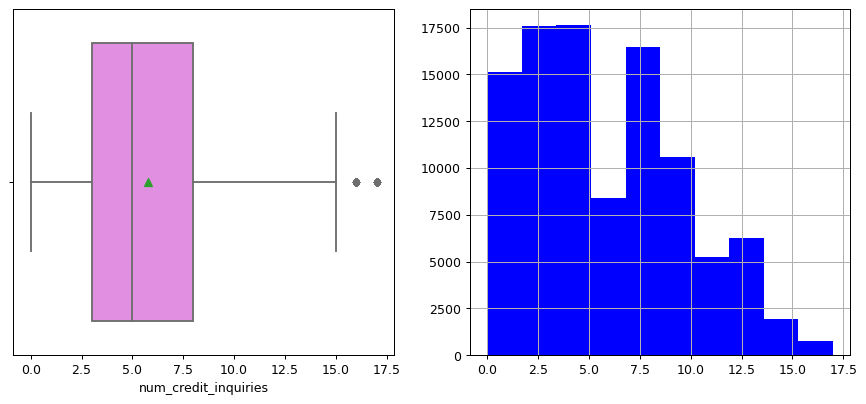

In [139]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.num_credit_inquiries, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['num_credit_inquiries'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 10. Outstanding_Debt


In [140]:
df3["outstanding_debt"].value_counts().sort_index().head(20)

0.23     8
0.34     8
0.54     8
0.56     8
0.77     8
0.95    16
1.20     8
1.23     8
1.30     8
1.33     8
1.37     8
1.42     8
1.48     8
2.04     8
2.13     8
2.43     8
3.31     8
3.50     8
3.68     8
3.74     8
Name: outstanding_debt, dtype: int64

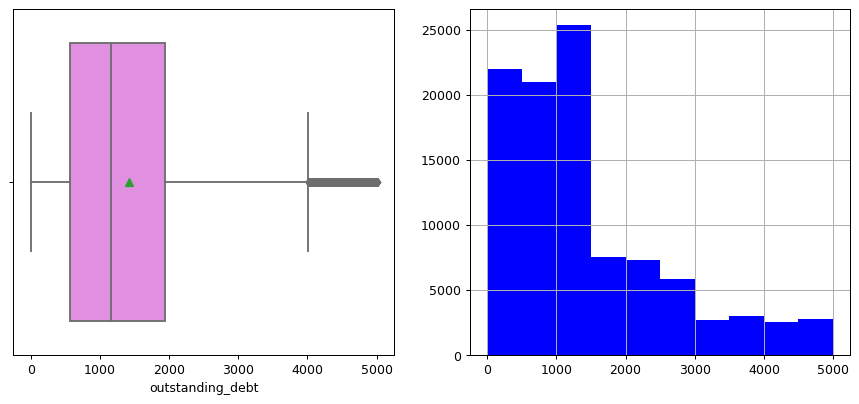

In [141]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.outstanding_debt, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['outstanding_debt'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 11. Credit_Utilization_Ratio


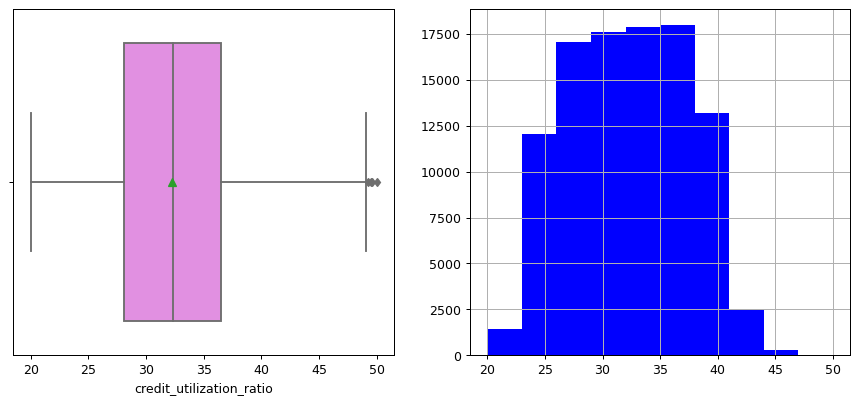

In [142]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.credit_utilization_ratio, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['credit_utilization_ratio'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 12. Total_Emi_Per_Month


In [143]:
df3.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()


8    9074
1    3385
7    2524
6     504
4     270
3     233
2     226
5     220
Name: total_emi_per_month, dtype: int64

In [144]:
df3.groupby("customer_id")["total_emi_per_month"].nunique().value_counts()


1    9074
2    2950
3     446
4      26
5       4
Name: total_emi_per_month, dtype: int64

In [145]:
df3.groupby('customer_id')['total_emi_per_month'].transform('nunique').value_counts()

1    72592
2    23600
3     3568
4      208
5       32
Name: total_emi_per_month, dtype: int64

In [146]:
df3['total_emi_per_month'] = df3.groupby('customer_id')['total_emi_per_month'].transform(
    lambda x: x.mode().iloc[0] if len(x.unique()) > 1 else x.iloc[0])

In [147]:
df3.groupby("customer_id")["total_emi_per_month"].value_counts().value_counts()


8    12500
Name: total_emi_per_month, dtype: int64

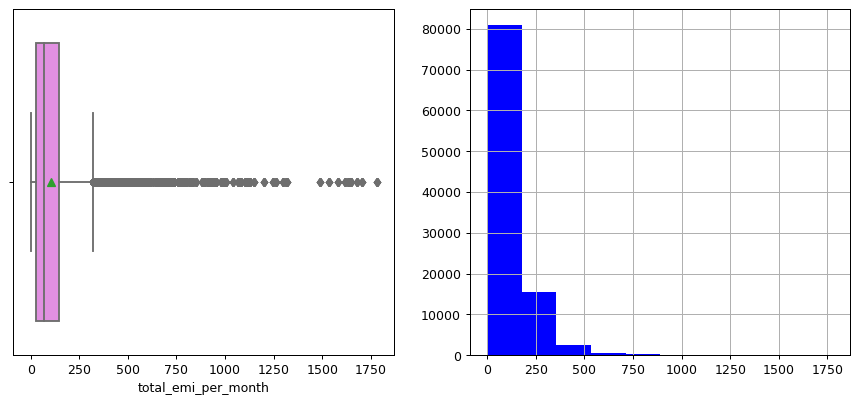

In [148]:
fig, axes = plt.subplots(1,2,figsize=(12,5),dpi = 90)

# count of col (countplot)

sns.boxplot(x =df3.total_emi_per_month, showmeans=True, orient='h',color="violet",data = df3,ax=axes[0] )

df3['total_emi_per_month'].hist(bins = 10,color='blue',ax=axes[1])

plt.show()

# 13. Amount_Invested_Monthly(số tiền đầu tư hàng tháng)


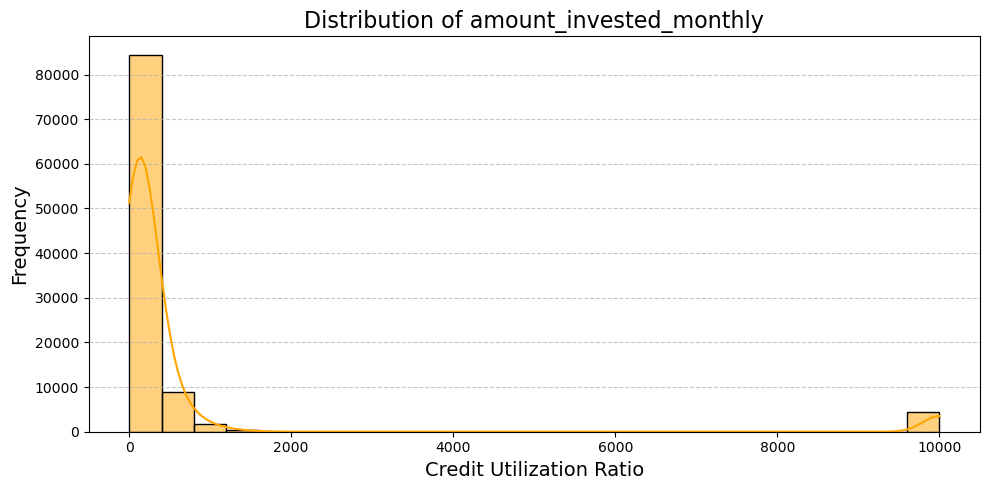

In [149]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="amount_invested_monthly", bins=25, kde=True, color='orange')

plt.title('Distribution of amount_invested_monthly', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 14. Monthly_Balance

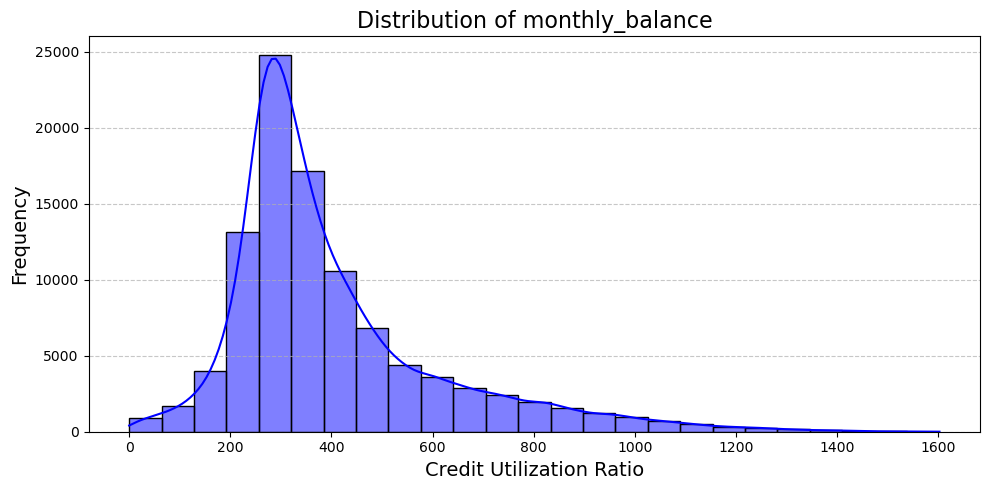

In [150]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df3, x="monthly_balance", bins=25, kde=True, color='blue')

plt.title('Distribution of monthly_balance', fontsize=16)
plt.xlabel('Credit Utilization Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

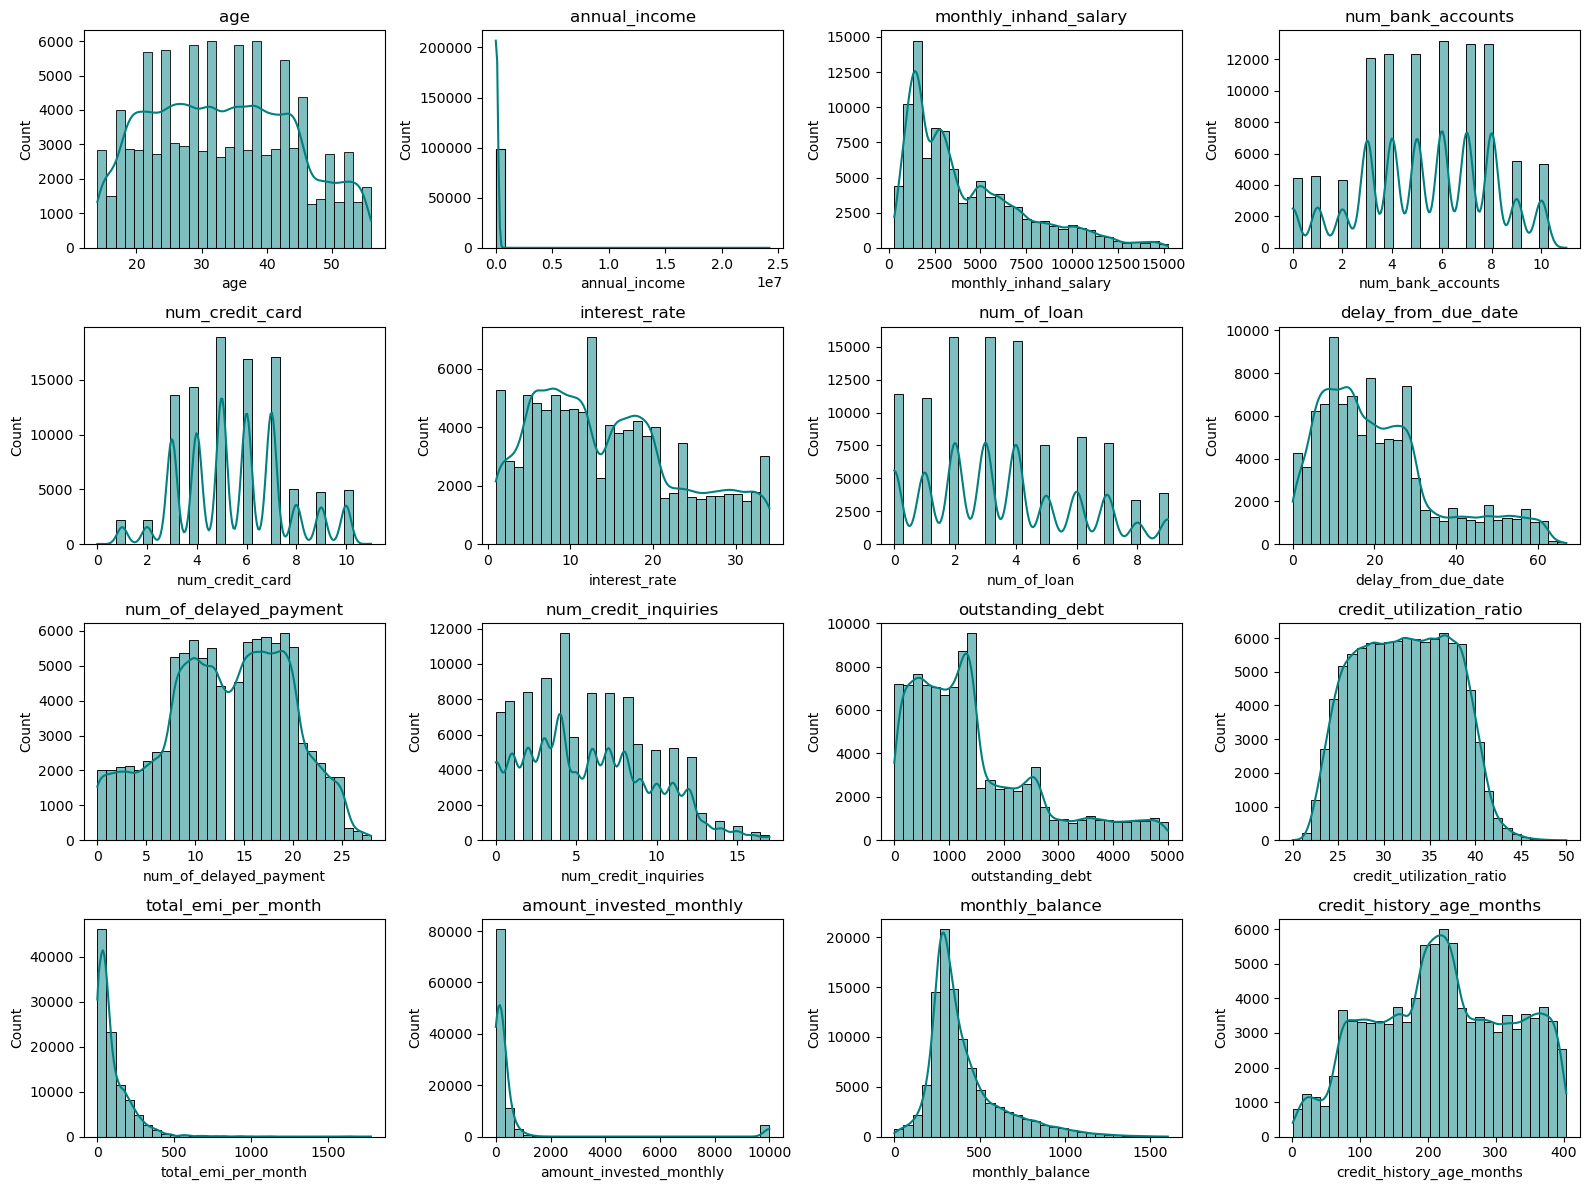

In [151]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df3.select_dtypes(include=['float32','float64', 'Int64', 'int16','int64']).columns, 1):
    plt.subplot(4, 4, i)  # 4 hàng, 5 cột (tuỳ chỉnh theo số biến)
    sns.histplot(df3[col], bins=30, kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()

plt.show()

# Xử lý dữ liệu Category

In [152]:
df4=df3.copy()

In [153]:
df4.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score', 'credit_history_age_months'],
      dtype='object')

In [156]:
df4["type_of_loan"] = df4["type_of_loan"].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(df4["type_of_loan"])
loan_encoded_df = pd.DataFrame(loan_encoded, columns=mlb.classes_)
loan_encoded_df.head()
# Ghép lại với DataFrame gốc
#df4 = pd.concat([df4.drop(columns=["type_of_loan"]), loan_encoded_df], axis=1)

,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1,0
2,1,1,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,0,0,1,0


In [145]:
# Credit_Mix: Bad = 0, Standard = 1, Good = 2
credit_mix_mapping = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2
}
df4['credit_mix'] = df4['credit_mix'].map(credit_mix_mapping)


Credit_Mix cho biết sự đa dạng trong các loại khoản vay của khách hàng (thế chấp, tín chấp, thẻ tín dụng, v.v.).

Bad (0): Danh mục tín dụng kém (có thể chỉ có một loại tín dụng hoặc có lịch sử tín dụng xấu).

Standard (1): Danh mục tín dụng ở mức chấp nhận được.

Good (2): Danh mục tín dụng tốt, thường có nhiều loại tín dụng được quản lý tốt.

In [158]:
# Payment_of_Min_Amount: No = 0, Yes = 1, NM (No Mention) = -1
payment_min_mapping = {
    'No': 0,
    'Yes': 1,
    'NM': -1
}
df4['payment_of_min_aamount'] = df4['payment_of_min_amount'].map(payment_min_mapping)


cho biết khách hàng có thanh toán số tiền tối thiểu trong kỳ hay không.

No (0): Không thanh toán khoản tối thiểu → có nguy cơ nợ xấu.

Yes (1): Có thanh toán khoản tối thiểu → quản lý tín dụng tốt hơn.

NM (-1): No Mention (không có thông tin) → giá trị thiếu, tạm mã hóa là -1 để phân biệt.

In [150]:
df4['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [151]:
# Payment_Behaviour: mã hóa 6 nhóm cụ thể
payment_behaviour_mapping = {
    'High_spent_Large_value_payments': 0,
    'High_spent_Medium_value_payments': 1,
    'High_spent_Small_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 4,
    'Low_spent_Small_value_payments': 5
}
df4['payment_behaviour'] = df4['payment_behaviour'].map(payment_behaviour_mapping)


mô tả hành vi chi tiêu và thanh toán của khách hàng:

High_spent: Chi tiêu nhiều

Low_spent: Chi tiêu ít

Large/Medium/Small_value_payments: Trị giá khoản thanh toán lớn, trung bình, nhỏ

→ Mã hóa theo kết hợp mức độ chi tiêu và thanh toán. Giá trị số 0–5 không có thứ tự tự nhiên rõ ràng nên mô hình cây (tree-based) thường phù hợp hơn hồi quy tuyến tính.



In [156]:
# Credit_Score: Poor = 0, Standard = 1, Good = 2
credit_score_mapping = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}
df4['credit_score'] = df4['credit_score'].map(credit_score_mapping)


Điểm tín dụng tổng thể của khách hàng:

Poor (0): Rủi ro cao

Standard (1): Mức trung bình

Good (2): Tín nhiệm cao